<body>
    <h1>Lista di Compiti</h1>
    <ul class="task-list">
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Il livello delle insegnante al mese</label>
        </li>
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Media di lezione al giorno</label>
        </li>
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Mettere in un archivio solo per l'algoritmo</label>
        </li>
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Adattare l'algoritmo</label>
        </li>
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Pensare su come renderlo riusabile</label>
        </li>
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Scaricare le immagini</label>
        </li>
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Riportare tutto da questo quaderno e creare la copertina e i testi</label>
        </li>
    </ul>
</body>

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
#from memoria import guida as gd

In [2]:
df = pd.read_csv('Lezioni.csv')
df = df.drop(columns='Unnamed: 0', axis=1)
df.head(5)

,Index,Data,Ora,Professoressa,Livello,Lezione,Giorno della settimana,Mese,Anno
0,1,2023-05-22,8,Virginia,B1,B132,Lunedì,Maggio,2023
1,2,2023-05-22,11,Graziana,B1,B135,Lunedì,Maggio,2023
2,3,2023-05-23,10,Francesca,C1,C123,Martedì,Maggio,2023
3,4,2023-05-23,11,Sara,B1,B143,Martedì,Maggio,2023
4,5,2023-05-24,10,Alice,B1,B141,Mercoledì,Maggio,2023


- Dividiamo i dati

In [3]:
df1 = df[(df['Mese'] == 'Giugno') | (df['Mese'] == 'Luglio') | (df['Mese'] == 'Agosto') | (df['Mese'] == 'Settembre') | (df['Mese'] == 'Ottobre')]
df2 = df[(df['Mese'] == 'Novembre') | (df['Mese'] == 'Dicembre') | (df['Mese'] == 'Gennaio') | (df['Mese'] == 'Febbraio')]


# Prime metriche

In [4]:
def differenza_giorni(dataframe):
    le_date = dataframe['Data']
    data = []
    
    for x in le_date:
        x = str(x)
        data.append(x[0:10])
    
    # Conversione delle stringhe in oggetti datetime
    oggetti_data = [datetime.strptime(data, "%Y-%m-%d") for data in data]
    differenze = []

    # Calcolo delle differenze in giorni
    for i in range(len(oggetti_data)-1):
        delta = oggetti_data[i+1] - oggetti_data[i]
        differenze.append(delta.days)
    
    differenza = round((sum(differenze)/len(differenze)), 1)
    testo = f'La media della differenza dei giorni tra le lezioni: {differenza} giorni. (Massimo: {max(differenze)})'
    
    maggiori_differenze = differenze
    maggiori_differenze = [int(valore) for valore in maggiori_differenze]
    #maggiori_differenze = list(set(maggiori_differenze))
    maggiori_differenze.sort(reverse=True)

    return differenza, testo, maggiori_differenze[:-1]

### DF1 - Fino ad Ottobre

- Le quantità

In [5]:
quantita, _ = df1.shape # Di lezioni
densita = round((quantita / ((df1.Mese.nunique()) * 30)), 2) # Densità
percentuale = round((densita * 100), 1) # Percentuale

print(f'Ci sono state {quantita} ore di lezioni durante più o meno {(df1.Mese.nunique()) * 30} giorni.')
print(f'La densità di lezioni al giorno {round(densita, 1)}')
print(f'La percentuale di lezioni che copre il periodo è {percentuale}%')
print(differenza_giorni(df1)[1])

from collections import Counter
conteggio = Counter(differenza_giorni(df1)[2])

for numero, ripetizioni in conteggio.items():
    print(f'{numero} -> {ripetizioni}')

Ci sono state 143 ore di lezioni durante più o meno 150 giorni.
La densità di lezioni al giorno 0.9
La percentuale di lezioni che copre il periodo è 95.0%
La media della differenza dei giorni tra le lezioni: 1.1 giorni. (Massimo: 7)
7 -> 1
5 -> 1
4 -> 4
3 -> 18
2 -> 5
1 -> 60
0 -> 52


### DF2 - Fino a Febbraio

- Le quantità

In [6]:
quantita, _ = df2.shape # Di lezioni
densita = round((quantita / ((df2.Mese.nunique()) * 30)), 2) # Densità
percentuale = round((densita * 100), 1) # Percentuale

print(f'Ci sono state {quantita} ore di lezioni durante più o meno {(df2.Mese.nunique()) * 30} giorni.')
print(f'La densità di lezioni al giorno {round(densita, 1)}')
print(f'La percentuale di lezioni che copre il periodo è {percentuale}%')
print(differenza_giorni(df2)[1])

conteggio = Counter(differenza_giorni(df2)[2])

for numero, ripetizioni in conteggio.items():
    print(f'{numero} -> {ripetizioni}')

Ci sono state 52 ore di lezioni durante più o meno 120 giorni.
La densità di lezioni al giorno 0.4
La percentuale di lezioni che copre il periodo è 43.0%
La media della differenza dei giorni tra le lezioni: 2.3 giorni. (Massimo: 12)
12 -> 1
8 -> 1
7 -> 1
6 -> 2
5 -> 2
4 -> 7
3 -> 4
2 -> 4
1 -> 22
0 -> 6


### Intervallo di giorni tra lezioni -- `IntervalloCV`

Tramite questo algoritmo si può arrivare a diverse conclusioni, soprattutto misurare se un mese ha avuto una buona quantità di lezione.  

In [7]:
ICV_df = df#[df['Livello'] == 'B2']

In [8]:
# Intervallo chiave e valore, es: 9 -- 28

def intervalloCV(dataframe, mese): # Somma degli intervalli e la loro ripetizione
    conteggio = Counter(differenza_giorni(dataframe[dataframe['Mese'] == mese])[2])
    chiave = sum(conteggio.keys())
    valore = sum(conteggio.values())

    return f'{mese} -> {chiave} -- {valore}', valore - chiave, chiave, valore

tutti_i_mesi = ICV_df.Mese.unique().tolist()
intervalloCV_differenze = []
intervalloCV_chiavi = []
intervalloCV_valori = []

for x in tutti_i_mesi:
    #print(intervalloCV(df, x)[0])
    #print(intervalloCV(df, x)[1])
    intervalloCV_differenze.append(intervalloCV(ICV_df, x)[1])
    intervalloCV_chiavi.append(intervalloCV(ICV_df, x)[2])
    intervalloCV_valori.append(intervalloCV(ICV_df, x)[3])

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tutti_i_mesi, y=intervalloCV_differenze, mode='lines', name='Differenza'))
fig.add_trace(go.Scatter(x=tutti_i_mesi, y=intervalloCV_chiavi, mode='lines', name='Giorni'))
fig.add_trace(go.Scatter(x=tutti_i_mesi, y=intervalloCV_valori, mode='lines', name='Ripetizione'))

fig.update_layout(
    title='IntervalloCV',
    xaxis=dict(title=''),
    yaxis=dict(title='Punteggi presi')
)

fig.show()

### Per entrambi i dati

- Distribuzione delle ore

In [10]:
df1.Ora.value_counts()

Ora
7     54
11    27
10    25
9     17
8     16
13     2
12     2
Name: count, dtype: int64

In [11]:
df2.Ora.value_counts()

Ora
7     24
10    11
8      6
9      5
11     3
13     2
17     1
Name: count, dtype: int64

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



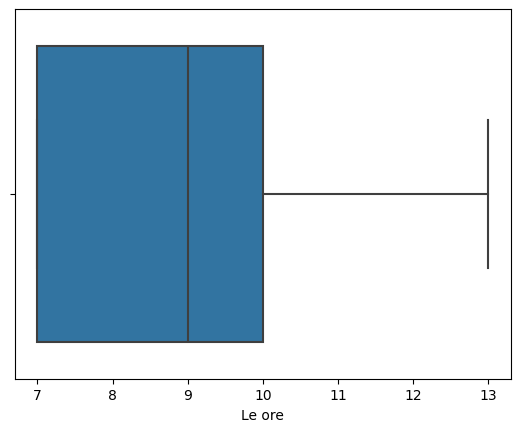

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



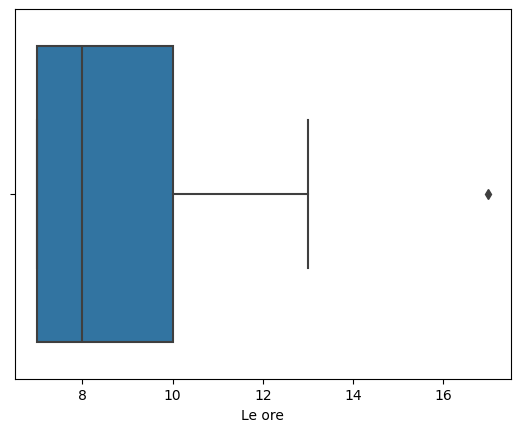

In [12]:
sns.boxplot(x=df1.Ora.tolist())
plt.xlabel('Le ore')
plt.show()
sns.boxplot(x=df2.Ora.tolist())
plt.xlabel('Le ore')
plt.show()

In [13]:
def plo(dataframe, orario):
    dizionario = dataframe.Ora.value_counts().to_dict()
    totale = sum(dizionario.values())
    try:
        valore = dizionario.get(orario)# int((dizionario.get(orario) / totale) * 100)
    except TypeError:
        return 0

    if valore != None:
        return valore
    else:
        return 0

plo(df2, 7)

24

In [14]:
primo = df1
secondo = df2

In [15]:
faixa_etaria = ["Alle 7", "Alle 8", "Alle 9", "Alle 10", "Alle 11", "Alle 12", "Alle 13"]

dados_faixa_etaria_homens = np.array([plo(primo, 7), plo(primo, 8), plo(primo, 9), plo(primo, 10),
                                      plo(primo, 11), plo(primo, 12), plo(primo, 13)])

dados_faixa_etaria_mulheres = np.array([plo(secondo, 7), plo(secondo, 8), plo(secondo, 9), plo(secondo, 10),
                                      plo(secondo, 11), plo(secondo, 12), plo(secondo, 13)])

In [16]:
piramide = go.Figure()

piramide.add_trace(go.Bar(x = dados_faixa_etaria_homens,
                         y = faixa_etaria,
                         orientation = "h",
                         name = "Primo periodo",
                         marker = dict(color = "#32CD32")))

piramide.add_trace(go.Bar(x = -dados_faixa_etaria_mulheres,
                         y = faixa_etaria,
                         orientation = "h",
                         name = "Secondo periodo",
                         marker = dict(color = "#E65CD9")))

piramide.update_layout(barmode = "overlay",
                      title = "Distribuzione degli orari",

                      plot_bgcolor = "white")

piramide.show()

# Grafico di linea dei mesi

Media dell'orario, densità di lezioni, la distanza massima tra una lezione e l'altra

In [17]:
months_order = ['Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre',
       'Novembre', 'Dicembre', 'Gennaio', 'Febbraio']

In [18]:
tutti_i_mesi = df1.Mese.unique().tolist()

In [19]:
def plot_grafico(dizionari, nome):
    x = list(dizionari.keys())
    y1 = list(dizionari.values())

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name='f', line=dict(color='lightseagreen')))

    fig.update_layout(title=nome,
                      xaxis_title='Mesi',
                      yaxis_title='Valori')

    fig.show()

### Media degli orari e le percentuali

In [20]:
orari = (df1.groupby('Mese')['Ora'].mean()).round().to_dict()
percentuali = ((df1.groupby('Mese')['Index'].count() / 30) * 100).round().to_dict()

In [21]:
orari = {k: v for k, v in sorted(orari.items(), key=lambda item: months_order.index(item[0]))}
percentuali = {k: v for k, v in sorted(percentuali.items(), key=lambda item: months_order.index(item[0]))}

### Distanza tra le lezioni

In [22]:
def differenza(data): # Lista con le date
    oggetti_data = [datetime.strptime(data, "%Y-%m-%d") for data in data]
    differenze = []

    for i in range(len(oggetti_data)-1):
        delta = oggetti_data[i+1] - oggetti_data[i]
        differenze.append(delta.days)
    return differenze

In [23]:
dizionario_differenza_media = {}
dizionario_differenza_max = {}

In [24]:
tutti_i_mesi_df = df2.Mese.unique().tolist()
for x in tutti_i_mesi_df:
    dfx = df2[df2['Mese'] == x]
    valori = differenza(dfx.Data.to_list())
    
    dizionario_differenza_media[x] = round((sum(valori) / len(valori)), 2)
    dizionario_differenza_max[x] = max(valori)
    tutti = dizionario_differenza_media.values()
    tutti_media = round((sum(tutti) / len(tutti)), 1)

In [25]:
tutti = dizionario_differenza_media

In [26]:
dizionario_differenza_max

{'Novembre': 4, 'Dicembre': 12, 'Gennaio': 5, 'Febbraio': 8}

In [27]:
plot_grafico(dizionario_differenza_media, f'Media della differenza di giorni tra le lezioni -- {tutti_media}')

In [28]:
plot_grafico(orari, 'Media degli orari per mese')

In [29]:
plot_grafico(percentuali, 'Percentuale di lezioni al mese')

In [30]:
dizionario_differenza_max

{'Novembre': 4, 'Dicembre': 12, 'Gennaio': 5, 'Febbraio': 8}

In [31]:
orari

{'Giugno': 9.0, 'Luglio': 8.0, 'Agosto': 9.0, 'Settembre': 9.0, 'Ottobre': 8.0}

In [32]:
percentuali

{'Giugno': 107.0,
 'Luglio': 80.0,
 'Agosto': 110.0,
 'Settembre': 80.0,
 'Ottobre': 100.0}

# Le insegnanti nel meriodo

In [33]:
months_order = ['Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre',
       'Novembre', 'Dicembre', 'Gennaio', 'Febbraio', 'Marzo']

- Prime cinque insegnate del periodo

In [34]:
insegnati_dizionario = df1.Professoressa.value_counts().to_dict()
#insegnati_piu_di_dieci = {k: v for k, v in insegnati_dizionario.items() if v > 9}
from itertools import islice
insegnati_dizionario = dict(islice(insegnati_dizionario.items(), 5))
insegnanti_del_periodo = list(insegnati_dizionario.keys())

In [35]:
insegnanti_del_periodo

['Federica', 'Lorella', 'Anna', 'Sabina', 'Francesca 2']

### Percentuale dei livelli ad ogni mese

In [36]:
tutti_i_mesi = df1.Mese.unique().tolist()
livello_totale = []

for x in tutti_i_mesi:
    livelli = ['B1', 'B2', 'C1']
    percentuale_per_livello = []
    dfz = df1[df1['Mese'] == x]
    quantita, _ = dfz.shape

    for i in livelli:
        dfx, _ = dfz[dfz['Livello'] == i].shape
        percentuale = int(round(((dfx / quantita) * 100), 0))
        percentuale_per_livello.append(percentuale)

    lista = [x, percentuale_per_livello[0], percentuale_per_livello[1], percentuale_per_livello[2]]
    livello_totale.append(lista)

In [37]:
punteggi_dei_livelli = []

In [38]:
for x in livello_totale:
    posizione = [0, x[1], x[2], x[3]]
    posizione = posizione.index(max(posizione))
    punteggi_dei_livelli.append(posizione)
    print(f'{x[0]} --> B1: {x[1]}% -- B2: {x[2]}% -- C1: {x[3]}%')

Giugno --> B1: 47% -- B2: 25% -- C1: 28%
Luglio --> B1: 58% -- B2: 29% -- C1: 12%
Agosto --> B1: 24% -- B2: 42% -- C1: 33%
Settembre --> B1: 21% -- B2: 33% -- C1: 46%
Ottobre --> B1: 7% -- B2: 43% -- C1: 50%


In [39]:
livello_totale

[['Giugno', 47, 25, 28],
 ['Luglio', 58, 29, 12],
 ['Agosto', 24, 42, 33],
 ['Settembre', 21, 33, 46],
 ['Ottobre', 7, 43, 50]]

In [40]:
punteggio_del_periodo = sum(punteggi_dei_livelli) / len(punteggi_dei_livelli)

In [41]:
punteggio_del_periodo

2.0

### Livello di ogni professoressa per mese

In [42]:
insegnanti_del_periodo

['Federica', 'Lorella', 'Anna', 'Sabina', 'Francesca 2']

In [43]:
data = {'Professoressa': ['Laura', 'Anna', 'Federica', 'Anna', 'Anna', 'Laura'],
        'Livello': ['C1', 'B1', 'C1', 'C1', 'C1', 'B2'],
        'Mese': ['Aprile', 'Aprile', 'Giugno', 'Aprile', 'Aprile', 'Luglio']}

data = pd.DataFrame(data)

In [44]:
# Calcoliamo le percentuali per ogni livello
df['count'] = 1
pivot_df = df.pivot_table(index=['Professoressa', 'Mese'], columns='Livello', values='count', aggfunc='sum', fill_value=0)
pivot_df = round(pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100)

# Creiamo il nuovo DataFrame con le percentuali dei livelli
data2 = {
    'Professoressa': pivot_df.index.get_level_values(0),
    'Mese': pivot_df.index.get_level_values(1),
    'Percentuale del Livello B1': pivot_df['B1'].values,
    'Percentuale del Livello B2': pivot_df['B2'].values,
    'Percentuale del Livello C1': pivot_df['C1'].values
}

new_df = pd.DataFrame(data2)

new_df.groupby(['Professoressa', 'Mese']).sum()

Percentuale del Livello B1  \
Professoressa Mese                                    
Alice         Agosto                            0.0   
              Febbraio                          0.0   
              Maggio                          100.0   
Anna          Agosto                           25.0   
              Dicembre                          0.0   
...                                             ...   
Sofia         Novembre                          0.0   
              Settembre                         0.0   
Virginia      Maggio                          100.0   
              Marzo                             0.0   
              Ottobre                           0.0   

                         Percentuale del Livello B2  \
Professoressa Mese                                    
Alice         Agosto                            0.0   
              Febbraio                          0.0   
              Maggio                            0.0   
Anna          Agosto                           25.0   
              Dicembre                        100.0   
...                                             ...   
Sofia         Novembre                          0.0   
              Settembre                       100.0   
Virginia      Maggio                            0.0   
              Marzo                             0.0   
              Ottobre                         100.0   

                         Percentuale del Livello C1  
Professoressa Mese                                   
Alice         Agosto                          100.0  
              Febbraio                        100.0  
              Maggio                            0.0  
Anna          Agosto                           50.0  
              Dicembre                          0.0  
...                                             ...  
Sofia         Novembre                        100.0  
              Settembre                         0.0  
Virginia      Maggio                            0.0  
              Marzo                           100.0  
              Ottobre                           0.0  

[132 rows x 3 columns]

In [45]:
data = df1[['Professoressa', 'Livello', 'Mese']]

# Calcolo delle frequenze dei livelli per ogni professoressa
pivot_table = pd.pivot_table(data, index=['Professoressa', 'Mese'], columns='Livello', aggfunc=len, fill_value=0)

# Calcolo delle percentuali
percentuali_df = round((pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100), 1)

# Resettiamo l'indice per ottenere un dataframe piatto
percentuali_df = percentuali_df.reset_index()

# Rinominiamo le colonne per soddisfare il formato richiesto
percentuali_df.columns.name = None
percentuali_df.columns = ['Professoressa', 'Mese', 'Percentuale del Livello B1', 'Percentuale del Livello B2', 'Percentuale del Livello C1']

percentuali_df = percentuali_df[percentuali_df['Professoressa'] == 'Federica']

In [46]:
def percentuale_livello_insegnante(professoressa:str):
    data = df1[['Professoressa', 'Livello', 'Mese']]
    lezioni_totali = df.groupby('Professoressa').size().reset_index(name='Totale di Lezioni')

    # Calcolo delle frequenze dei livelli per ogni professoressa
    pivot_table = pd.pivot_table(data, index=['Professoressa', 'Mese'], columns='Livello', aggfunc=len, fill_value=0)
    
    # Calcolo delle percentuali
    percentuali_df = round((pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100), 1)

    # Resettiamo l'indice per ottenere un dataframe piatto
    percentuali_df = percentuali_df.reset_index()

    # Rinominiamo le colonne per soddisfare il formato richiesto
    percentuali_df.columns.name = None
    percentuali_df.columns = ['Professoressa', 'Mese', 'Percentuale B1', 'Percentuale B2', 'Percentuale C1']

    #percentuali_df = pd.merge(percentuali_df.reset_index(), lezioni_totali, on='Professoressa')
    #lezioni_totali = pd.merge(percentuali.reset_index(), lezioni_totali, on='Professoressa')

    if professoressa != '':
        percentuali_df = percentuali_df[percentuali_df['Professoressa'] == professoressa]
        return percentuali_df
    else:
        return percentuali_df
    
percentuale_livello_insegnante('Lorella')

,Professoressa,Mese,Percentuale B1,Percentuale B2,Percentuale C1
49,Lorella,Agosto,40.0,20.0,40.0
50,Lorella,Luglio,50.0,25.0,25.0
51,Lorella,Ottobre,0.0,33.3,66.7
52,Lorella,Settembre,0.0,0.0,100.0


### Bozze

In [47]:
data = {'Professoressa': ['Anna', 'Federica', 'Anna', 'Anna', 'Laura'],
        'Livello': ['B1', 'C1', 'C1', 'C1', 'B2'],
        'Mese': ['Aprile', 'Giugno', 'Aprile', 'Aprile', 'Luglio']}

data = pd.DataFrame(data)

lezioni_per_mese = data.groupby(['Professoressa', 'Livello', 'Mese']).size().reset_index(name='Numero di Lezioni')
lezioni_per_mese


,Professoressa,Livello,Mese,Numero di Lezioni
0,Anna,B1,Aprile,1
1,Anna,C1,Aprile,2
2,Federica,C1,Giugno,1
3,Laura,B2,Luglio,1


In [48]:
insegnanti_del_periodo_df = df2[(df2['Professoressa'] == 'Federica') | (df2['Professoressa'] == 'Lorella') |
                                (df2['Professoressa'] == 'Anna') | (df2['Professoressa'] == 'Sabina') | 
                                (df2['Professoressa'] == 'Francesca 2') ]

In [49]:
insegnanti_del_periodo_df = df2[['Livello', 'Professoressa', 'Mese', 'Index']]
insegnanti_del_periodo_df = insegnanti_del_periodo_df.groupby(['Professoressa', 'Mese', 'Livello']).count().head(5)#.to_dict()

In [50]:
insegnanti_del_periodo_df

Index
Professoressa Mese     Livello       
Alice         Febbraio C1           1
Anna          Dicembre B2           1
              Gennaio  C1           2
Asia          Gennaio  C1           1
              Novembre B2           1

In [51]:
insegnanti_del_periodo_df = insegnanti_del_periodo_df.to_dict()
insegnanti_del_periodo_df

{'Index': {('Alice', 'Febbraio', 'C1'): 1,
  ('Anna', 'Dicembre', 'B2'): 1,
  ('Anna', 'Gennaio', 'C1'): 2,
  ('Asia', 'Gennaio', 'C1'): 1,
  ('Asia', 'Novembre', 'B2'): 1}}

In [52]:
resultato = [[key[0], key[1], key[2], value] for key, value in insegnanti_del_periodo_df['Index'].items()]
print(resultato)

[['Alice', 'Febbraio', 'C1', 1], ['Anna', 'Dicembre', 'B2', 1], ['Anna', 'Gennaio', 'C1', 2], ['Asia', 'Gennaio', 'C1', 1], ['Asia', 'Novembre', 'B2', 1]]


In [53]:
# Creare un dizionario per tenere traccia del massimo valore per ogni persona e mese
max_values = {}
result = []

for person, month, category, value in resultato:
    key = (person, month)
    if key not in max_values or value > max_values[key]:
        max_values[key] = value

# Creare la lista finale con il mese in cui ogni persona ha ottenuto il massimo valore
for (person, month), max_value in max_values.items():
    result.append([person, month, category, max_value])

print(result)

[['Alice', 'Febbraio', 'B2', 1], ['Anna', 'Dicembre', 'B2', 1], ['Anna', 'Gennaio', 'B2', 2], ['Asia', 'Gennaio', 'B2', 1], ['Asia', 'Novembre', 'B2', 1]]


In [54]:
for x in insegnanti_del_periodo:
    lista = []
    for i in result:
        if i[0] == x:
            lista.append(x)

In [55]:
insegnanti_dizionario = {}

### Quantità di lezioni ad ogni mese di una professoressa

In [56]:
def calcola_differenza(professoressa):
    insegnante = df[df['Professoressa'] == professoressa]
    insegnante = (insegnante.groupby('Mese')['Index'].count()).round()
    insegnante = insegnante.to_dict()

    #months_order = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']

    mesi = list(insegnante.keys())
    differenza = list(set(months_order) - set(mesi))

    if len(differenza) > 0:
        for x in differenza:
            insegnante[x] = 0

    insegnante = {k: v for k, v in sorted(insegnante.items(), key=lambda item: months_order.index(item[0]))}
    
    return insegnante

In [57]:
calcola_differenza(insegnanti_del_periodo[0])

{'Maggio': 0,
 'Giugno': 0,
 'Luglio': 6,
 'Agosto': 10,
 'Settembre': 0,
 'Ottobre': 4,
 'Novembre': 3,
 'Dicembre': 3,
 'Gennaio': 1,
 'Febbraio': 0,
 'Marzo': 0}

In [58]:
# Dati per le due linee
x = months_order
y1 = list(calcola_differenza(insegnanti_del_periodo[0]).values())
y2 = list(calcola_differenza(insegnanti_del_periodo[1]).values()) 
y3 = list(calcola_differenza(insegnanti_del_periodo[2]).values()) 
y4 = list(calcola_differenza(insegnanti_del_periodo[3]).values()) 
y5 = list(calcola_differenza(insegnanti_del_periodo[4]).values())

# Creare il grafico di linea con due linee
fig = go.Figure()

# Aggiungere la prima linea con colore blu
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name=insegnanti_del_periodo[0], line=dict(color='green')))
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name=insegnanti_del_periodo[1], line=dict(color='red')))
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines+markers', name=insegnanti_del_periodo[2], line=dict(color='lightseagreen')))
fig.add_trace(go.Scatter(x=x, y=y4, mode='lines+markers', name=insegnanti_del_periodo[3], line=dict(color='orange')))
fig.add_trace(go.Scatter(x=x, y=y5, mode='lines+markers', name=insegnanti_del_periodo[4], line=dict(color='blue')))

# Aggiungere etichette e titoli
fig.update_layout(title='Grafico dei livelli',
                  xaxis_title='Mesi',
                  yaxis_title='Valori')

# Mostrare il grafico
fig.show()

In [59]:
percentuale_livello_insegnante('Lorella')

,Professoressa,Mese,Percentuale B1,Percentuale B2,Percentuale C1
49,Lorella,Agosto,40.0,20.0,40.0
50,Lorella,Luglio,50.0,25.0,25.0
51,Lorella,Ottobre,0.0,33.3,66.7
52,Lorella,Settembre,0.0,0.0,100.0


In [60]:
def crea_traccia(x, y, nome): # Funzione per creare le trace
    return go.Bar(
        x=x,
        y=y,
        name=nome
    )

def genera_grafico(mese_di_ricerca, tutte_le_professoresse:list):
    TLP = tutte_le_professoresse
    categorie = ['B1', 'B2', 'C1'] # Saranno i livelli
    gruppi = []

    def VPI(professoressa, livello):
        # Percentuale di un livello preso da una professoressa in un certo mese
        df_VP = df1[df1['Mese'] == mese_di_ricerca]
        totale, _ = df_VP[df_VP['Professoressa'] == professoressa].shape
        del_livello, _ = df_VP[(df_VP['Professoressa'] == professoressa) & (df_VP['Livello'] == livello)].shape
       
        try: # Per l'eccezioni
            percentuale = (del_livello / totale) * 100
            nome = f'{professoressa} ({totale})'
            gruppi.append(nome)
            return percentuale
        except ZeroDivisionError:
            return 0

    # Punteggi presi da un certo livello per insegnante
    valori1 = [VPI(TLP[0], 'B1'), VPI(TLP[1], 'B1'), VPI(TLP[2], 'B1'), VPI(TLP[3], 'B1')]
    valori2 = [VPI(TLP[0], 'B2'), VPI(TLP[1], 'B2'), VPI(TLP[2], 'B2'), VPI(TLP[3], 'B2')]
    valori3 = [VPI(TLP[0], 'C1'), VPI(TLP[1], 'C1'), VPI(TLP[2], 'C1'), VPI(TLP[3], 'C1')]

    # Creazione delle tracce utilizzando la funzione
    trace1 = crea_traccia(gruppi, valori1, 'B1')
    trace2 = crea_traccia(gruppi, valori2, 'B2')
    trace3 = crea_traccia(gruppi, valori3, 'C1')

    # Impostazione del layout
    layout = go.Layout(
        barmode='group',  # Imposta il tipo di barra su gruppo
        title=f"Grafico del mese di {mese_di_ricerca}:",
        xaxis=dict(title=''),
        yaxis=dict(title='')
    )

    # Creazione della figura
    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

    # Visualizzazione del grafico
    fig.show()

# Utilizzo della funzione per generare il grafico
genera_grafico('Agosto', tutte_le_professoresse=['Federica', 'Lorella', 'Anna', 'Sabina'])

In [61]:
d = df1[df1['Mese'] == 'Agosto']
print(d.Professoressa.value_counts())

Professoressa
Federica     10
Lorella       5
Anna          4
Sabina        4
Francesca     2
Mirela        1
Chiara        1
Grazia        1
Elena         1
Giusy         1
Alice         1
Silvia        1
Sara          1
Name: count, dtype: int64


# Le immarsioni

In [62]:
ICV_df = df#[df['Livello'] == 'C1']

In [63]:
ICV_df = pd.read_csv('Lezioni.csv')
ICV_df = ICV_df.drop(columns='Unnamed: 0', axis=1)

In [64]:
def filtra_dizionario(dizionario, valore_minimo): # Funzione per filtrare un dizionario
    risultato = {chiave: valore for chiave, valore in dizionario.items() if valore > valore_minimo}
    return risultato

- Immersioni che ci sono state ed il giorno

In [65]:
immaersioni = filtra_dizionario(ICV_df.Data.value_counts().to_dict(), 1) # Tutte le immersioni
immaersioni = dict(sorted(immaersioni.items())) # Messe in ordine in base alle date
print(immaersioni)

{'2023-05-22': 2, '2023-05-23': 2, '2023-05-24': 2, '2023-05-26': 2, '2023-05-29': 2, '2023-05-30': 2, '2023-05-31': 2, '2023-06-01': 3, '2023-06-02': 3, '2023-06-05': 2, '2023-06-06': 2, '2023-06-07': 2, '2023-06-12': 3, '2023-06-14': 2, '2023-06-19': 3, '2023-06-20': 3, '2023-06-27': 2, '2023-06-30': 2, '2023-07-03': 4, '2023-07-05': 2, '2023-07-11': 2, '2023-07-19': 2, '2023-07-31': 2, '2023-08-01': 2, '2023-08-03': 2, '2023-08-04': 2, '2023-08-07': 3, '2023-08-08': 3, '2023-08-09': 2, '2023-08-11': 2, '2023-08-17': 2, '2023-08-24': 2, '2023-08-29': 3, '2023-09-04': 2, '2023-09-12': 2, '2023-09-13': 3, '2023-09-14': 2, '2023-09-18': 2, '2023-09-19': 2, '2023-10-02': 2, '2023-10-03': 2, '2023-10-04': 2, '2023-10-06': 2, '2023-10-09': 2, '2023-10-10': 2, '2023-10-16': 2, '2023-10-18': 2, '2023-10-30': 2, '2023-10-31': 2, '2023-11-06': 2, '2023-11-23': 2, '2023-11-27': 2, '2023-11-30': 2, '2023-12-05': 2, '2023-12-06': 2, '2024-01-17': 2, '2024-03-15': 2, '2024-03-18': 2, '2024-03-20':

- Diviso per mese

In [66]:
#Funzione creata il 10/03
def ImmersionePerMese(lista, mese_cercato, totale_del_mese):
    verifica = lambda data: True if mese_cercato in data else False
    risultato = {chiave: valore for chiave, valore in lista.items() if bool(verifica(chiave)) == True}
    totale = len(risultato.values())

    # Dettagli
    try:
        #print(f'La media del mese: {sum(risultato.values()) / totale}')
        totale_lezione = []
        for x in list(set(list(risultato.values()))):
            #print(list(risultato.values()).count(x))#
            #print(f'{x} -- {list(risultato.values()).count(x)}')
            totale_lezione.append(x * list(risultato.values()).count(x))

        valore = (totale_del_mese - sum(totale_lezione)) + totale
        #print(f'Totale di lezioni: {sum(totale_lezione)}')
        #print(f'Ci sarebbero state {valore} lezioni se non ci fossero le immersioni.')

        return risultato, valore, sum(totale_lezione)
    except ZeroDivisionError:
        print('Non ci sono state immersioni in questo mese.')
        return 0

ImmersionePerMese(immaersioni, '-06-', 32)[0]

{'2023-06-01': 3,
 '2023-06-02': 3,
 '2023-06-05': 2,
 '2023-06-06': 2,
 '2023-06-07': 2,
 '2023-06-12': 3,
 '2023-06-14': 2,
 '2023-06-19': 3,
 '2023-06-20': 3,
 '2023-06-27': 2,
 '2023-06-30': 2}

Ora dobbiamo creare un grafico di linea per avere il totale di lezioni fatte, quante ci sarebbero state se non ci fossero le immersioni, e la quantità di lezioni fatte a causa di un'immersione.

In [67]:
months_order = ['Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre',
       'Novembre', 'Dicembre', 'Gennaio', 'Febbraio', 'Marzo']

valore = 'Mese'
df_mese = ICV_df[['Index', valore]]

def media(giorno):
    giorno = (giorno / 30) #* 100
    return giorno

df_mese[valore] = pd.Categorical(df_mese[valore], categories=months_order, ordered=True)
D = df_mese.sort_values(valore).groupby(valore).count().to_dict()#.plot(figsize=[15,5])

# Estraiamo il dizionario dei mesi
mesi = D['Index']
totale_di_lezioni_al_mese = []

# Iteriamo attraverso le chiavi (mesi) e stampiamo i valori corrispondenti
for mese, valore in mesi.items():
    #print(f"Il valore di {mese} è {valore}")
    totale_di_lezioni_al_mese.append(valore)

C:\Users\Soldado\AppData\Local\Temp\ipykernel_7148\2931758132.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Soldado\AppData\Local\Temp\ipykernel_7148\2931758132.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [68]:
mesi = ['05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03']
ipotesi = []
totale_immersione = []

for x, y in zip(totale_di_lezioni_al_mese, mesi):
    ipotesi.append(ImmersionePerMese(immaersioni, f'-{y}-', x)[1])
    totale_immersione.append(ImmersionePerMese(immaersioni, f'-{y}-', x)[2])

In [69]:
x = ICV_df.Mese.unique().tolist()

y1 = totale_di_lezioni_al_mese # Totale di lezioni fatte 
y2 = totale_immersione # Totale d'immersione
y3 = ipotesi # Ipotesi

# Creare il grafico di linea con due linee
fig = go.Figure()

# Aggiungere la prima linea con colore blu
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name='Lezioni fatte', line=dict(color='lightseagreen')))

# Aggiungere la seconda linea con colore rosso
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name="Totale d'immersione", line=dict(color='lightskyblue')))

# Aggiungere la terza linea con colore verde
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines+markers', name='Ipotesi', line=dict(color='red')))

# Aggiungere etichette e titoli
fig.update_layout(title='Grafico delle immersioni',
                  xaxis_title='Mesi',
                  yaxis_title='Valori')

# Mostrare il grafico
fig.show()

# Le caratteristiche

In [70]:
sum(list(dizionario_differenza_media.values()))

9.530000000000001

In [71]:
dizionario_differenza_media

{'Novembre': 1.56, 'Dicembre': 2.2, 'Gennaio': 1.77, 'Febbraio': 4.0}

In [72]:
import plotly.graph_objects as go

def valore(dizionario:dict):
    return round((sum(list(dizionario.values())) / len(list(dizionario.values()))), 1)

df = pd.DataFrame(dict(
categorie = ["Percentuale", "Orari", "Distanza", "Distanza massima", "Livelli"],
periodo = [float(list(str(valore(percentuali)))[0]), valore(orari), 
           valore(dizionario_differenza_media), max(dizionario_differenza_max.values()), 
           punteggio_del_periodo]))
df

,categorie,periodo
0,Percentuale,9.0
1,Orari,8.6
2,Distanza,2.4
3,Distanza massima,12.0
4,Livelli,2.0


In [73]:
fig = go.Figure()

def aggiungi_traccia(fig, df, colonna):
    fig.add_trace(go.Scatterpolar(
        r = df[colonna],
        theta = df["categorie"],
        fill = "toself",
        name = "Janeiro",
        line = dict(color = "#63A644"),
        fillcolor = "#63A644",
        opacity = 0.2
    ))

for x in df.columns[1:].to_list():
    aggiungi_traccia(fig, df, x)

fig.show()
#import plotly.io as pio
#pio.write_image(fig, 'grafico.png')

In [74]:
# Dati per i gruppi e le barre
gruppi = ['Gruppo 1', 'Gruppo 2', 'Gruppo 3']
categorie = ['Categoria A', 'Categoria B', 'Categoria C']
valori1 = [10, 20, 15]
valori2 = [15, 25, 20]
valori3 = [20, 10, 25]

# Creazione delle tracce per ogni barra
trace1 = go.Bar(
    x=gruppi,
    y=valori1,
    name='Categoria A'
)
trace2 = go.Bar(
    x=gruppi,
    y=valori2,
    name='Categoria B'
)
trace3 = go.Bar(
    x=gruppi,
    y=valori3,
    name='Categoria C'
)

# Impostazione del layout
layout = go.Layout(
    barmode='group',  # Imposta il tipo di barra su gruppo
    title='Grafico a barre diviso in gruppi',
    xaxis=dict(title='Gruppi'),
    yaxis=dict(title='Valori')
)

# Creazione della figura
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Visualizzazione del grafico
fig.show()